# Heart Disease Classification

it is a classification problem since i can predicting whether a patient has heart disease or not

supervised learning since i can given labeled data


## Problem Definition
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data
The original data came from the Cleveland database from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

## Evaluation
If i can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features

1. age - age in years

1. sex - male or female (1 / 0)

1. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

1. trestbps - resting blood pressure

1. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern

1. fbs - fasting blood sugar > 120 mg/dl
* 1 = true
* 0 = false
* '>126' mg/dL signals diabetes

1. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber


1. thalach - maximum heart rate achieved 

1. exang - exercise induced angina

1. oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots) 

thal - thalium stress result    
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising

1. target - 1 or 0 (1 = heart disease, 0 = no heart disease)

### prepare the tool
I'm going to use pandas, matplotlib and numpy for data analysis and manipulation
and seaborn for give a better visualization

In [3]:

# Import all the tools
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Spilliting
from sklearn.model_selection import train_test_split, cross_val_score

# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 


In [4]:
# load the data
df = pd.read_csv('heart-disease.csv')

# check the shape
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# check if data already clean
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# how many each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

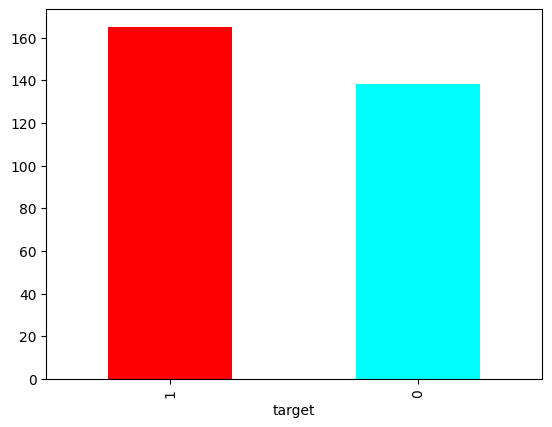

In [9]:
df['target'].value_counts().plot(kind="bar", color=["red", "cyan"])


<Axes: xlabel='sex'>

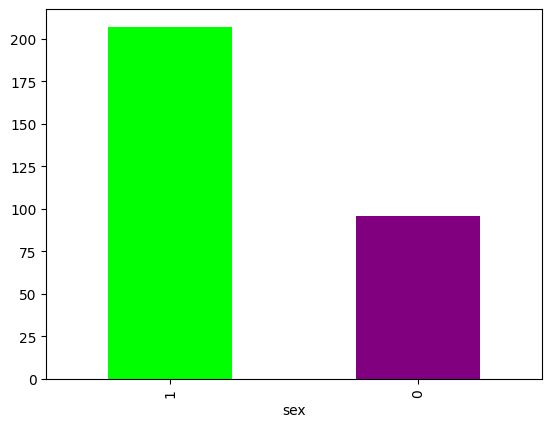

In [10]:
df['sex'].value_counts().plot(kind="bar", color=['lime','purple'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex


In [13]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# compare target column with sex column

cross_tab = pd.crosstab(df['target'], df['sex'])

# Renaming the column
cross_tab.rename(columns={0: 'female', 1 : 'male'}, inplace=True)
cross_tab.rename(index = {0: 'no', 1 : 'yes'}, inplace=True)
cross_tab

sex,female,male
target,,
no,24,114
yes,72,93


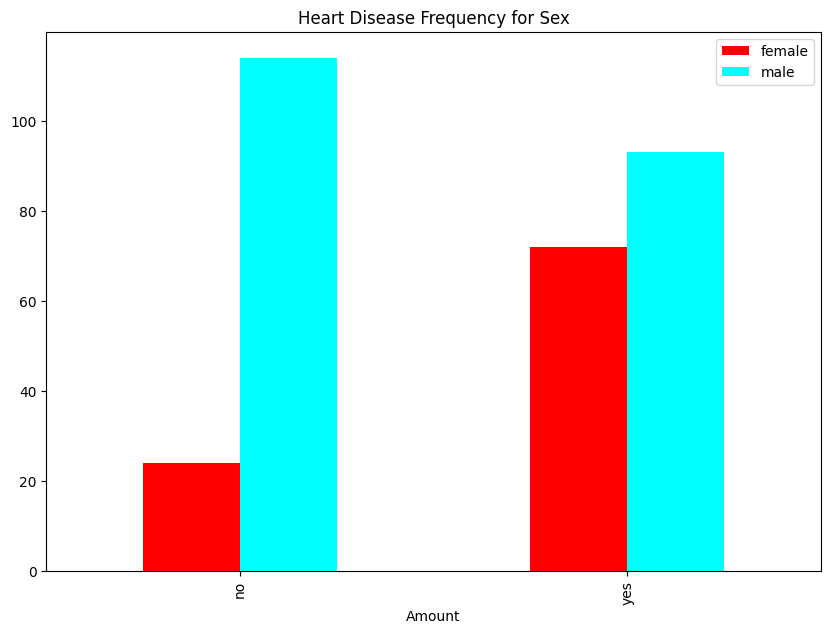

In [15]:
# Create plot of crosstab
cross_tab.plot(kind="bar", figsize=(10,7) ,color=["red", "cyan"])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel("Amount")
plt.legend(['female', 'male'])

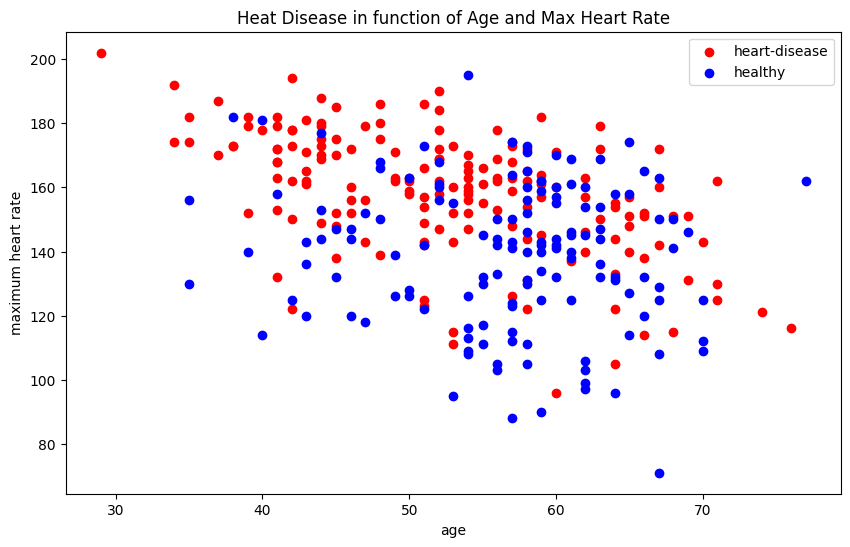

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1],df.thalach[df.target ==1], c='red')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='blue')
plt.legend(['heart-disease', 'healthy'])
plt.xlabel('age')
plt.ylabel('maximum heart rate')
plt.title('Heat Disease in function of Age and Max Heart Rate')
plt.show()

<Axes: ylabel='Frequency'>

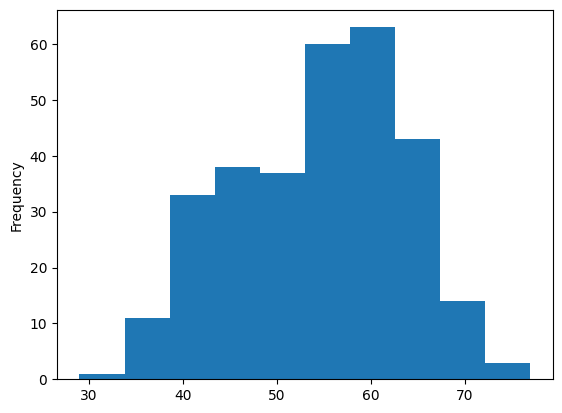

In [17]:
# check age distribution

df.age.plot.hist()

In [18]:
cross_tab2 = pd.crosstab(df.cp, df.target)
cross_tab2.rename(columns= {0:"healthy", 1:"heart disease"}, inplace=True)
cross_tab2

target,healthy,heart disease
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

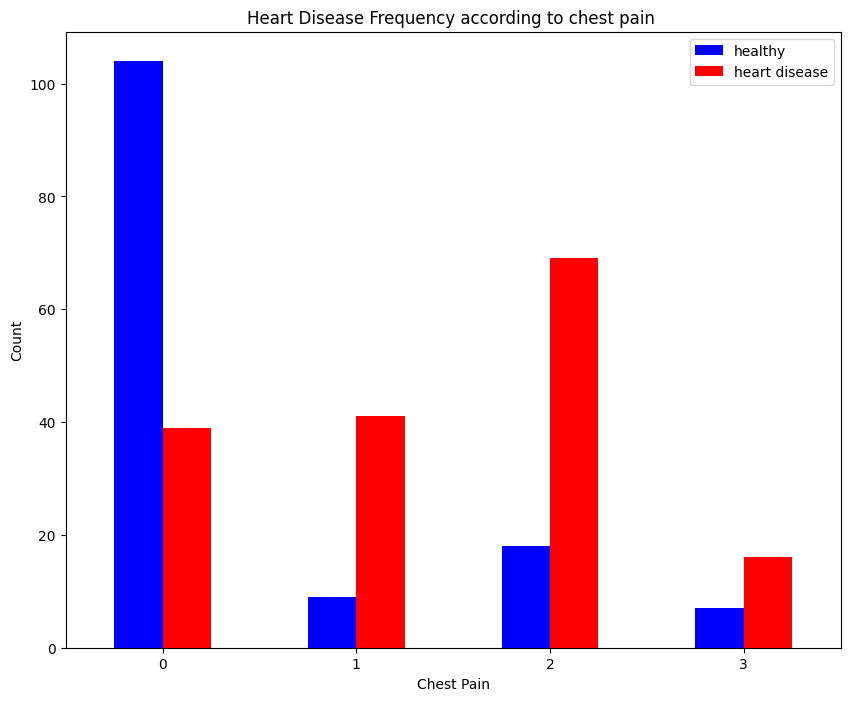

In [19]:
cross_tab2.plot(kind='bar', figsize=(10,8), color=['blue', 'red'])
plt.xlabel("Chest Pain")
plt.ylabel("Count")
plt.legend(["healthy", "heart disease"])
plt.title('Heart Disease Frequency according to chest pain ')
plt.xticks(rotation=0)

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


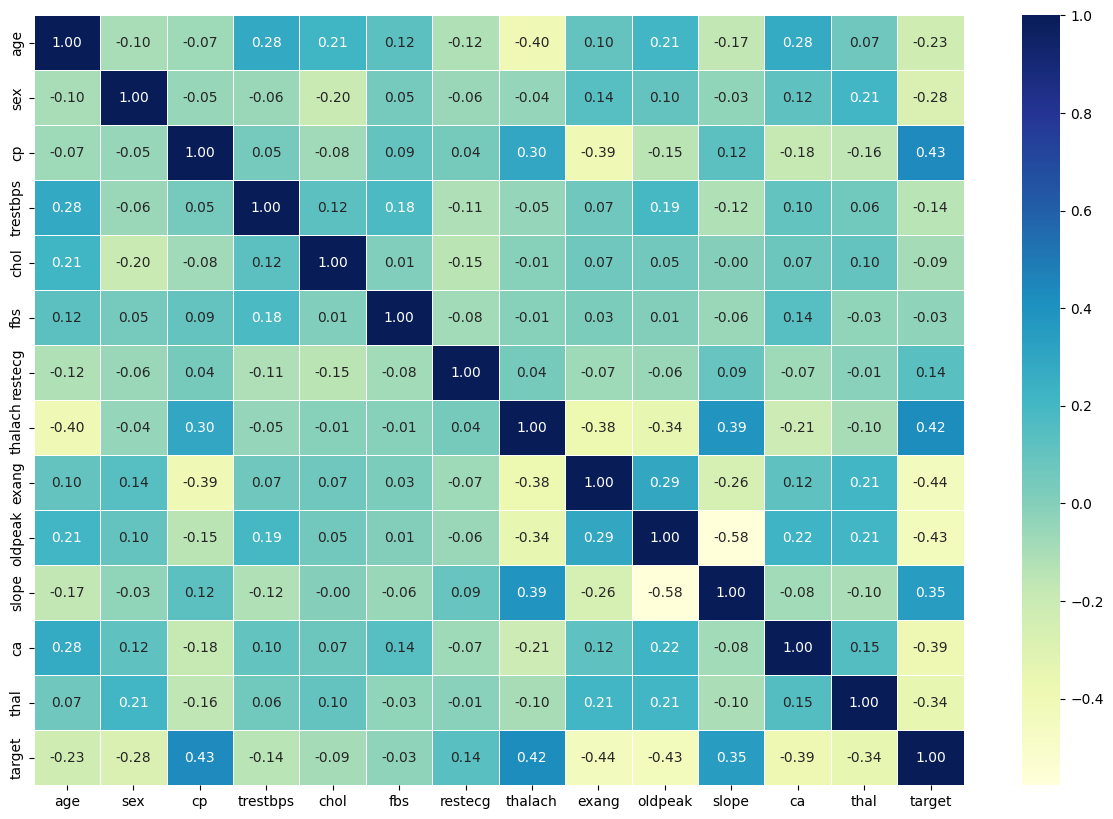

In [26]:
# let make correlation matrix

corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f", cmap="YlGnBu" ) 

### 5 Modelling
I'm going to try 3 different machine learning models:
1. Logistic Regression
1. K-Nearest Neighbours Classifier
1. Random Forest Classifier


In [58]:
x = df.drop('target', axis=1)
y = df.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [130]:
model = {   "log_regresion" : LogisticRegression(random_state=3),
            "knn" : KNeighborsClassifier(n_neighbors=5),
            "random_forest": RandomForestClassifier(n_estimators=5) }

In [160]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    fits and evaluates given machine learning models.
    models = dic of different machine learning model
    x_test = testing data
    x_train = train data
    y_train = label of training
    y_test = label of testing
    '''

    # Make a dic to keep model score
    model_scores = {}
    print(models)
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
fit_and_score(model, x_train, x_test, y_train, y_test)


{'log_regresion': LogisticRegression(random_state=3), 'knn': KNeighborsClassifier(), 'random_forest': RandomForestClassifier(n_estimators=5)}


/home/christopher/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'log_regresion': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'random_forest': 0.7868852459016393}

### Model Comparison
I'm going to compare the models using the following metrics:
* Accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision


{'log_regresion': LogisticRegression(random_state=3), 'knn': KNeighborsClassifier(), 'random_forest': RandomForestClassifier(n_estimators=5)}


/home/christopher/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

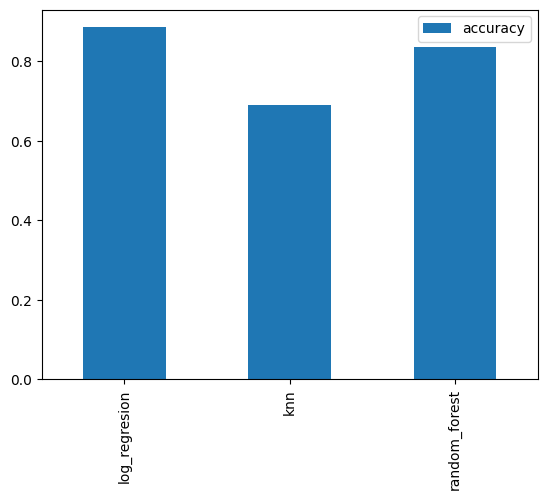

In [164]:
model_compare = pd.DataFrame(fit_and_score(model, x_train, x_test, y_train, y_test), index=['accuracy'])
model_compare.T.plot.bar()